<a href="https://colab.research.google.com/github/shubhamshelke26/ML_Mini_Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
%matplotlib inline

In [ ]:
kickstarter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kickstarter_17_18.csv")

In [ ]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.00,failed,15,US,100.00,2421.00,30000.00
1,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,5000,4/5/2017 19:44,94175.00,successful,761,GB,57763.78,121857.33,6469.73
2,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,9/7/2017,2500,8/8/2017 1:20,1.00,failed,1,AU,0.00,0.81,2026.10
3,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,5/3/2017,50000,4/3/2017 17:11,57577.31,successful,840,US,10120.00,57577.31,50000.00
4,1000149007,Unschooling To University Book Project,Nonfiction,Publishing,CAD,1/19/2018,3000,11/20/2017 18:15,592.00,live,24,CA,185.65,472.88,2396.36


In [ ]:
kickstarter.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
52319,999814706,Pug Life - Inspired by the Pug,Apparel,Fashion,GBP,5/3/2017,5000,4/3/2017 1:07,0.0,failed,0,GB,0.00,0.00,6469.73
52320,999878813,Ways to Look at the Moon,Shorts,Film & Video,USD,10/13/2017,10000,8/29/2017 6:57,10245.0,successful,123,US,145.00,10245.00,10000.00
52321,999929142,Ã‰POUVANTAILS : 28mm Figurines de jeux pour KI...,Tabletop Games,Games,EUR,10/31/2017,1000,10/4/2017 11:26,1246.0,successful,35,FR,66.72,1452.47,1165.70
52322,999963618,Colorado International Activism Film Festival,Narrative Film,Film & Video,USD,4/9/2017,500,2/8/2017 2:28,135.0,failed,6,US,45.00,135.00,500.00
52323,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,4/19/2017,6500,3/20/2017 22:08,154.0,failed,4,US,0.00,154.00,6500.00


In [ ]:
kickstarter.shape

(52324, 15)

In [ ]:
kickstarter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

id - id number of the project

name - name of the project

category - contains the category and sub-category of the project

currency - original currency the project goal was denominated in

deadline - date and time of when the project will close for donations

goal - funding goal

launched - date and time of when the project was launched for funding

pledged - amount pledged in the current_currency

state - whether a project was successful, failed, canceled,  
        suspending or still live

backers - number of people who contributed funds to the project

country - country the project creator is from

usd_pledged - amount pledged in USD




In [ ]:
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,5.232400e+04,5.232400e+04,5.232400e+04,52324.000000,5.232400e+04,5.232400e+04,5.232400e+04
mean,1.073590e+09,5.796805e+04,1.494460e+04,127.179134,2.409275e+03,1.192689e+04,4.195359e+04
std,6.177103e+08,1.346317e+06,1.153186e+05,709.081140,2.245294e+04,9.317242e+04,1.100352e+06
min,4.813900e+04,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.500000e-01
25%,5.418739e+08,2.000000e+03,4.100000e+01,2.000000,0.000000e+00,3.900000e+01,2.000000e+03
50%,1.073723e+09,6.500000e+03,6.900000e+02,12.000000,7.692500e+01,6.263300e+02,5.827775e+03
75%,1.603879e+09,2.000000e+04,5.152247e+03,64.000000,6.582000e+02,4.566135e+03,1.700000e+04
max,2.147446e+09,1.000000e+08,1.003530e+07,43733.000000,1.627446e+06,7.072757e+06,1.073699e+08


In [ ]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52324 entries, 0 to 52323
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                52324 non-null  int64  
 1   name              52324 non-null  object 
 2   category          52324 non-null  object 
 3   main_category     52324 non-null  object 
 4   currency          52324 non-null  object 
 5   deadline          52324 non-null  object 
 6   goal              52324 non-null  int64  
 7   launched          52324 non-null  object 
 8   pledged           52324 non-null  float64
 9   state             52324 non-null  object 
 10  backers           52324 non-null  int64  
 11  country           52324 non-null  object 
 12  usd pledged       52324 non-null  float64
 13  usd_pledged_real  52324 non-null  float64
 14  usd_goal_real     52324 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 6.0+ MB


In [ ]:
# Now we check how many unique values are in categories and subcategories to use them later for the clustering.
kickstarter['main_category'].unique()

array(['Film & Video', 'Games', 'Fashion', 'Publishing', 'Photography',
       'Technology', 'Art', 'Music', 'Journalism', 'Design', 'Food',
       'Comics', 'Crafts', 'Theater', 'Dance'], dtype=object)

In [ ]:
#Describe the unive values for different statuses of projects
kickstarter['state'].unique()

array(['failed', 'successful', 'live', 'canceled', 'suspended'],
      dtype=object)

In [ ]:
kickstarter['state'].value_counts(normalize = True)

failed        0.476970
successful    0.352840
canceled      0.110236
live          0.053455
suspended     0.006498
Name: state, dtype: float64

In [ ]:
kickstarter['state'].value_counts()

failed        24957
successful    18462
canceled       5768
live           2797
suspended       340
Name: state, dtype: int64

In [ ]:
# Remove all the rows where the state is undefined - we can't use them for the further predictions.
kickstarter = kickstarter[kickstarter.state != 'undefined']
kickstarter.shape

(52324, 15)

In [ ]:
# A significant number of projects are still ongoing, as the numbers for these projects cannot be used for predictions.
kickstarter = kickstarter[kickstarter.state != 'live']
kickstarter.shape

(49527, 15)

Now we will change the categorical values to some numbers

we change the following to funded (value of 1):

-Succesful

we change the following to unsuccesfull (value of 0)

-Failed

-Canceled

-Suspended

In [ ]:
categorical_nums = {"state":{"failed": 0, "canceled": 0, "suspended" :0, "successful" : 1, "live" : 1}}
kickstarter["orignal_state"] = kickstarter["state"]
kickstarter.replace(categorical_nums, inplace=True)
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,orignal_state
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.00,0,15,US,100.00,2421.00,30000.00,failed
1,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,5000,4/5/2017 19:44,94175.00,1,761,GB,57763.78,121857.33,6469.73,successful
2,1000081649,MikeyJ clothing brand fundraiser,Childrenswear,Fashion,AUD,9/7/2017,2500,8/8/2017 1:20,1.00,0,1,AU,0.00,0.81,2026.10,failed
3,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,5/3/2017,50000,4/3/2017 17:11,57577.31,1,840,US,10120.00,57577.31,50000.00,successful
5,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,3/27/2017,1500,3/2/2017 4:01,856.00,0,25,US,324.00,856.00,1500.00,failed


In [ ]:
kickstarter['category'].unique()

array(['Narrative Film', 'Tabletop Games', 'Childrenswear', 'Animation',
       'People', 'Software', 'Shorts', 'Gadgets', 'Art', 'Comedy',
       'Publishing', 'Latin', 'Music', 'Hardware', 'Games', 'Audio',
       'Apparel', 'Design', 'Performance Art', "Children's Books",
       'Vegan', 'Public Art', 'Photography', 'Product Design', 'Rock',
       'Fiction', 'Print', 'Thrillers', 'Video Games', 'Metal',
       'Wearables', 'Apps', 'Illustration', 'Documentary', 'Nonfiction',
       'Comic Books', 'Knitting', 'Small Batch', 'Fashion', 'Technology',
       'Young Adult', 'Jewelry', 'Horror', 'Comics', 'Science Fiction',
       'DIY Electronics', 'Crafts', 'Spaces', 'Playing Cards',
       'Festivals', 'Film & Video', 'Web', 'Anthologies', 'Hip-Hop',
       'Country & Folk', 'Mobile Games', 'Art Books', 'Live Games',
       'Webcomics', 'Zines', 'Accessories', 'Blues', 'Puzzles',
       'Workshops', 'Painting', 'Drinks', 'Photobooks', 'Jazz', 'Drama',
       'Sound', 'Fabrication Tool

In [ ]:
kickstarter['currency'].unique()

array(['USD', 'GBP', 'AUD', 'EUR', 'MXN', 'CAD', 'SEK', 'DKK', 'HKD',
       'NOK', 'SGD', 'CHF', 'NZD', 'JPY'], dtype=object)

In [ ]:
kickstarter.describe()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
count,4.952700e+04,4.952700e+04,4.952700e+04,49527.000000,49527.000000,4.952700e+04,4.952700e+04,4.952700e+04
mean,1.072964e+09,5.690422e+04,1.527528e+04,0.372766,130.513962,2.474611e+03,1.226890e+04,4.078940e+04
std,6.180171e+08,1.309232e+06,1.178752e+05,0.483546,722.990769,2.301927e+04,9.546398e+04,1.039428e+06
min,4.813900e+04,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,5.500000e-01
25%,5.400481e+08,2.000000e+03,4.600000e+01,0.000000,2.000000,0.000000e+00,4.153500e+01,1.971870e+03
50%,1.073558e+09,6.200000e+03,7.310000e+02,0.000000,13.000000,8.000000e+01,6.640000e+02,5.707500e+03
75%,1.602882e+09,2.000000e+04,5.320500e+03,1.000000,67.000000,6.800000e+02,4.834505e+03,1.700000e+04
max,2.147446e+09,1.000000e+08,1.003530e+07,1.000000,43733.000000,1.627446e+06,7.072757e+06,1.073699e+08


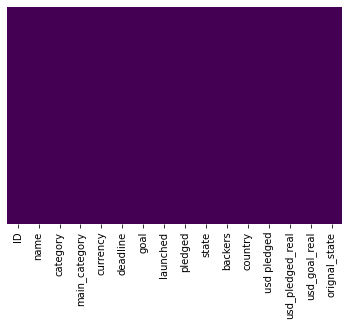

In [ ]:
sns.heatmap(kickstarter.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
kickstarter.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
orignal_state       0
dtype: int64

In [ ]:
kickstarter.drop(['ID','goal','category','usd pledged'], axis='columns', inplace=True)

In [ ]:
kickstarter.head()

,name,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,orignal_state
0,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,11/1/2017,9/2/2017 4:43,2421.00,0,15,US,2421.00,30000.00,failed
1,Tombstone: Old West tabletop game and miniatur...,Games,GBP,5/3/2017,4/5/2017 19:44,94175.00,1,761,GB,121857.33,6469.73,successful
2,MikeyJ clothing brand fundraiser,Fashion,AUD,9/7/2017,8/8/2017 1:20,1.00,0,1,AU,0.81,2026.10,failed
3,My Moon - Animated Short Film,Film & Video,USD,5/3/2017,4/3/2017 17:11,57577.31,1,840,US,57577.31,50000.00,successful
5,Penny Bingo Playing Card Game fun for the whol...,Games,USD,3/27/2017,3/2/2017 4:01,856.00,0,25,US,856.00,1500.00,failed


In [ ]:
kickstarter['deadline2'] = pd.to_datetime(kickstarter['deadline'])
kickstarter['launched2'] = pd.to_datetime(kickstarter['launched'])

In [ ]:
#created new column 'days' including the counts between launch dates and projects deadlines
#np.busday_count is used to counts the number of valid days between startday and enday
kickstarter['days'] = np.busday_count(pd.to_datetime(kickstarter['launched2']).values.astype('datetime64[D]'), \
            pd.to_datetime(kickstarter['deadline2']).values.astype('datetime64[D]'))

In [ ]:
kickstarter.head(10)

,name,main_category,currency,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,orignal_state,deadline2,launched2,days
0,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,USD,11/1/2017,9/2/2017 4:43,2421.00,0,15,US,2421.00,30000.00,failed,2017-11-01,2017-09-02 04:43:00,42
1,Tombstone: Old West tabletop game and miniatur...,Games,GBP,5/3/2017,4/5/2017 19:44,94175.00,1,761,GB,121857.33,6469.73,successful,2017-05-03,2017-04-05 19:44:00,20
2,MikeyJ clothing brand fundraiser,Fashion,AUD,9/7/2017,8/8/2017 1:20,1.00,0,1,AU,0.81,2026.10,failed,2017-09-07,2017-08-08 01:20:00,22
3,My Moon - Animated Short Film,Film & Video,USD,5/3/2017,4/3/2017 17:11,57577.31,1,840,US,57577.31,50000.00,successful,2017-05-03,2017-04-03 17:11:00,22
5,Penny Bingo Playing Card Game fun for the whol...,Games,USD,3/27/2017,3/2/2017 4:01,856.00,0,25,US,856.00,1500.00,failed,2017-03-27,2017-03-02 04:01:00,17
6,H2O The Underwater Portraits,Photography,USD,10/30/2017,9/25/2017 17:17,6.00,0,2,US,6.00,9500.00,failed,2017-10-30,2017-09-25 17:17:00,25
7,Shreddit - Privacy on Reddit,Technology,GBP,7/2/2017,6/2/2017 12:20,0.00,0,0,GB,0.00,2579.35,failed,2017-07-02,2017-06-02 12:20:00,21
8,The Silence of Hollowind - Urban Fantasy RPG,Games,EUR,11/23/2017,10/24/2017 16:58,11238.00,1,346,IT,13347.43,5938.52,successful,2017-11-23,2017-10-24 16:58:00,22
9,Bad Example (A Southern Trailer Park Fairy Tal...,Film & Video,USD,5/8/2017,4/3/2017 23:25,22.00,0,2,US,22.00,1800.00,failed,2017-05-08,2017-04-03 23:25:00,25
10,iRNinja - Control your TV with a simple press ...,Technology,USD,6/14/2017,5/10/2017 16:00,74.00,0,6,US,74.00,500.00,failed,2017-06-14,2017-05-10 16:00:00,25


Exploratory Data Analysis

The distribution of project states

Our goal with this exploration is to get an idea of how many projects actually succeed compared to the rest of the project states, which we to some extent, consider unsuccessful. In the graph bellow we can see that most projects fail to reach their goal and many are canecled. A good number of projects are successful though.

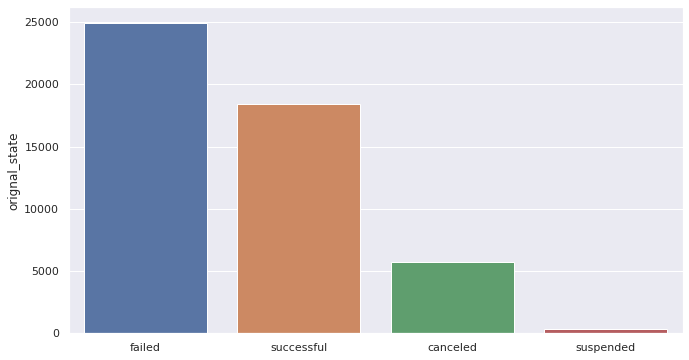

In [ ]:
sns.set(rc={'figure.figsize':(11,6)})
sns.barplot(x=kickstarter.orignal_state.value_counts().index, y=kickstarter.orignal_state.value_counts());

Number of successful projects in each category of projects

Now we would like to explore the distirbution of successful projects across categories. This will tell us which categories of projects are more likely to succeed in receiving the necessary funding. First, lets visualize it in a simple bar chart.

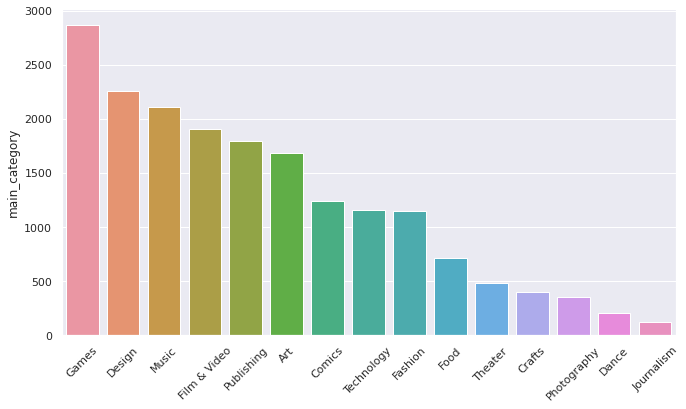

In [ ]:
my_temp_dataset = kickstarter[kickstarter.orignal_state == "successful"]
sns.set(rc={'figure.figsize':(11,6)})
ax = sns.barplot(x=my_temp_dataset.main_category.value_counts().index, y=my_temp_dataset.main_category.value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

So it seems that there are more projects with the topic of Games, Design and music that are succesful than those in dance, photography and journalism. But this does not really provide a full picture since we left out the failed projects. So lets include those.

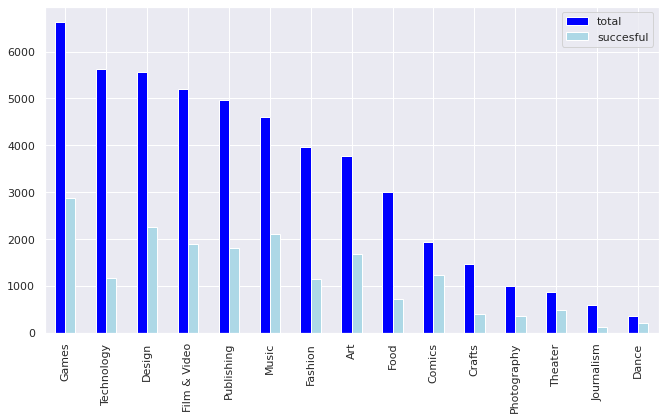

In [ ]:
succesful_projects = pd.concat([kickstarter.main_category.value_counts(), my_temp_dataset.main_category.value_counts()], axis=1)
sns.set(rc={'figure.figsize':(11,6)})
succesful_projects.columns.values[0] = "total"
succesful_projects.columns.values[1] = "succesful"
succesful_projects.sort_values(by='total')

succesful_projects.plot(kind='bar', color=['blue', 'lightblue']);

3. How do the backers spread across the categories of projects

We could also look at how many backers there are on average for each category. Below we can see that the projects that succeeded (state==1) have a much higher number of backers on average than those that fail (state==0). Some of the categories have way more backers like design, games and technology. It is likely because these projects are expensive to fund and thus require a larger number of backers to be successful.

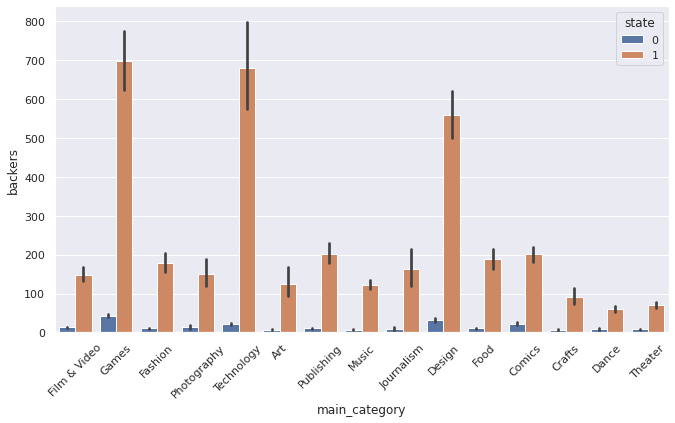

In [ ]:
# And now adding the hue function to see how distribution of succesfull and unsuccesfull projects across categories
sns.set(rc={'figure.figsize':(11,6)})
ax = sns.barplot(x="main_category", y="backers", hue="state", data=kickstarter);
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

So now that we gained an understanding of how the backers spread across categories, lets just for giggles see how they spread across countries. Maybe this will tell the creators where they need push their idea.

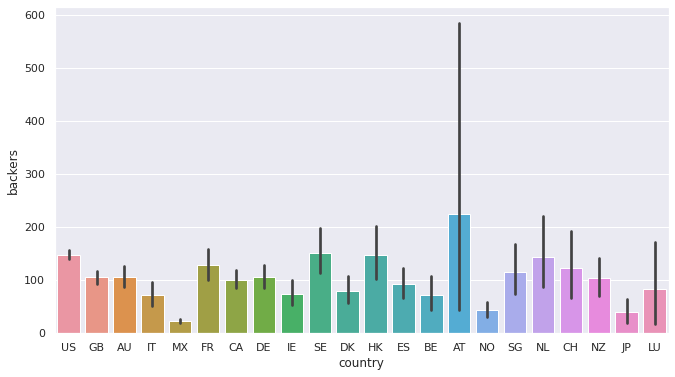

In [ ]:
sns.set(rc={'figure.figsize':(11,6)})
ax = sns.barplot(x="country", y="backers", data=kickstarter)

Hmm we seem to have some uncertainty or variation in our data judging by the error bars. But apart from that we can see that countries like Hong Kong and Singapore have projects with a high number of backers. Others like Mexico and Norway have fever backers on average.

4. The relationship between funding goals and actual received fundings (in USD)

We want to explore the funding goal that the projects have and their actual received funding. So we compare their goal to their received funding. In order to get a plot that we are able to interpret, we will only look at the projects with a goal of less than 10000 USD.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


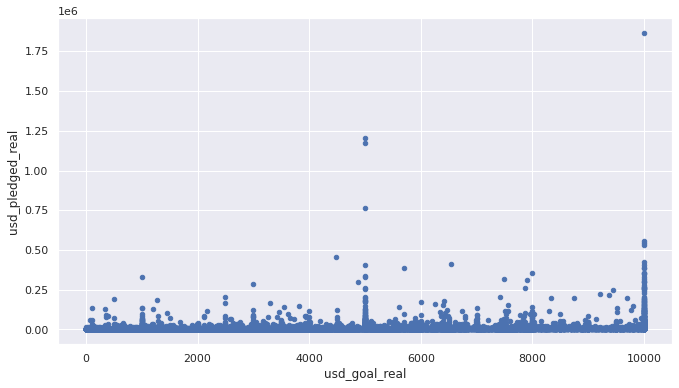

In [ ]:
my_cheap_projects = kickstarter[kickstarter.usd_goal_real <= 10000]
var = 'usd_goal_real'
data = pd.concat([my_cheap_projects['usd_pledged_real'], my_cheap_projects['usd_goal_real']], axis=1)
my_plot = data.plot.scatter(x=var,  y='usd_pledged_real');


In [ ]:
kickstarter.corr()

,pledged,state,backers,usd_pledged_real,usd_goal_real,days
pledged,1.000000,0.142456,0.693767,0.840936,0.001727,0.015843
state,0.142456,1.000000,0.201702,0.145893,-0.023091,-0.152128
backers,0.693767,0.201702,1.000000,0.821984,0.000172,0.005122
usd_pledged_real,0.840936,0.145893,0.821984,1.000000,0.002199,0.016427
usd_goal_real,0.001727,-0.023091,0.000172,0.002199,1.000000,0.034464
days,0.015843,-0.152128,0.005122,0.016427,0.034464,1.000000


Clustering

In [ ]:
kickstarter['main_category'].unique()

array(['Film & Video', 'Games', 'Fashion', 'Photography', 'Technology',
       'Art', 'Publishing', 'Music', 'Journalism', 'Design', 'Food',
       'Comics', 'Crafts', 'Dance', 'Theater'], dtype=object)

In [ ]:
# We create a dataframe that only contains these columns
kick_clustering = kickstarter[['state','backers','days','main_category','usd_pledged_real']]

In [ ]:
# To recode these we can use mapping
mapping = {'Publishing' : 1, 'Film & Video' : 2, 'Music' : 3, 'Food' : 4, 'Design' : 5, 'Crafts' : 6, 'Games' : 7, 'Comics' : 8, 'Fashion' : 9, 'Theater': 10, 'Art' : 11, 'Photography' : 12,'Technology' : 13, 'Dance' : 14, 'Journalism' :15}

In [ ]:
kick_clustering['main_category'] = kick_clustering['main_category'].map(mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kick_clustering.describe()

,state,backers,days,main_category,usd_pledged_real
count,49527.000000,49527.000000,49527.000000,49527.000000,4.952700e+04
mean,0.372766,130.513962,23.244029,6.549014,1.226890e+04
std,0.483546,722.990769,8.251925,3.997846,9.546398e+04
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,0.000000,2.000000,21.000000,3.000000,4.153500e+01
50%,0.000000,13.000000,22.000000,6.000000,6.640000e+02
75%,1.000000,67.000000,25.000000,9.000000,4.834505e+03
max,1.000000,43733.000000,45.000000,15.000000,7.072757e+06


In [ ]:
z = kick_clustering.iloc[:,0:5]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
z = scaler.fit_transform(z)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)

In [ ]:
model.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kick_clustering['cluster'] = model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Let's check out if there are actually projects in 3rd cluster 
kick_clustering[kick_clustering['cluster'] == 2]

,state,backers,days,main_category,usd_pledged_real,cluster
39,1,5946,33,13,4236618.49,2
83,1,12758,22,13,1374021.00,2
3380,1,10964,25,13,1251380.03,2
6489,1,18184,23,13,2542045.48,2
7198,1,12439,15,7,2229365.37,2
8705,1,10573,44,5,2203254.00,2
8927,1,33720,22,7,1865140.89,2
11229,1,26832,23,5,3763048.66,2
11952,1,8340,33,13,1048262.00,2
13045,1,13539,44,5,534184.00,2


In [ ]:
kick_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49527 entries, 0 to 52323
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             49527 non-null  int64  
 1   backers           49527 non-null  int64  
 2   days              49527 non-null  int64  
 3   main_category     49527 non-null  int64  
 4   usd_pledged_real  49527 non-null  float64
 5   cluster           49527 non-null  int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 3.7 MB
